In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


**Brief Description about the dataset**

The Indian Food Dataset contains information on 255 traditional Indian dishes, detailing their ingredients, dietary category (vegetarian/non-vegetarian), preparation and cooking times, flavor profiles, and regional origins. It provides insights into India's diverse culinary landscape, covering various courses like main dishes, snacks, and desserts. The dataset can be used for exploratory data analysis (EDA), food trend analysis, and recipe recommendations. However, minor data inconsistencies, such as missing regional data and negative time values, require cleaning. Overall, it serves as a flavorful dataset for understanding Indian cuisine from a data science perspective. 🍛📊

name – The celebrity dish name. 🍲

ingredients – The VIP guest list for each recipe. 📋

diet – Vegetarian or not (no food fights, please). 🥦🥩

prep_time – Time to chop, mix, and complain. ⏱️

cook_time – Time to sweat in the kitchen. 🔥

flavor_profile – Sweet? Spicy? Or identity crisis? 🌶️🍬

course – Dessert, snack, main… basically the role it plays on the plate. 🍽️

state – Where the dish was born. 🗺️

region – The broader area. Think "North, East, West, South". 🧭

**Issues with the dataset**

Dirty Data :

1.  Dish name, ingredients, state, region in capatalize form should be in lower case.
    
Messy data :

wrong values in cook time, prep time, flavour_profile, region, state column which is -1. `invalidity`

one missing value in region column. `accuracy`






Copy the dataset for Data Cleaning , Visualization and EDA processing.

In [21]:
df1 = df.copy()

In [22]:
df1.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [24]:
df1.sample(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
183,Gatta curry,"Yogurt, besan, sauce, garam masala powder, gra...",vegetarian,10,20,spicy,main course,Rajasthan,West
214,Khichu,"Rice flour, sesame seeds, baking soda, peanut oil",vegetarian,5,10,spicy,snack,Gujarat,West
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
231,Brown Rice,"Brown rice, soy sauce, olive oil",vegetarian,15,25,-1,main course,-1,-1
15,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North


In [25]:
df1.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


**Name**

There is no issue in name column so let's focus on next column.


In [26]:
df1['name'] = df1['name'].str.lower()

Ingredients.

I split the ingredients column on comma so we can find out:
   
   *  Counting individual ingredients 🍅
   *  Finding rare or common ingredients 🌶️
   *  Building co-occurrence networks (which ingredients go together) 🧄🧅






In [27]:
df1['ingredients'] = df1['ingredients'].str.split(',')


In [28]:
df1.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"[Maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,boondi,"[Gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, rai...",vegetarian,15,60,sweet,dessert,Punjab,North
3,ghevar,"[Flour, ghee, kewra, milk, clarified butte...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,gulab jamun,"[Milk powder, plain flour, baking powder, g...",vegetarian,15,40,sweet,dessert,West Bengal,East


**Prep Time**

Result will be higly skewed but we can't do anything because values are totally accurate.

There are 30 incorrect values in preptime so let's manually fix them.

In [29]:
df1['prep_time'].describe()

,prep_time
count,255.000000
mean,31.105882
std,72.554409
min,-1.000000
25%,10.000000
50%,10.000000
75%,20.000000
max,500.000000


In [30]:
df1['prep_time'].value_counts()

,count
prep_time,
10,98
20,40
-1,30
15,22
5,16
30,12
25,5
45,5
120,5


In [31]:
df1[df1['prep_time'] == -1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,sohan papdi,"[Gram flour, ghee, sugar, milk, cardamom]",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,chhena kheeri,"[Chhena, sugar, milk]",vegetarian,-1,60,sweet,dessert,Odisha,East
65,pork bharta,"[Boiled pork, onions, chillies, ginger and ...",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"[Sesame oil, drumstick, tamarind paste, sam...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"[Urad dal, curry leaves, sugar, mustard see...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"[Raw rice, jaggery, milk]",vegetarian,-1,-1,spicy,main course,Kerala,South
152,poriyal,"[Chana dal, urad dal, beans, coconut, must...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
167,kolim jawla,"[Baingan, fish, coconut oil, fresh coconut,...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
172,bombil fry,"[Bombay duck, malvani masala, rice flour, b...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
185,ghooghra,"[Dry fruits, semolina, all purpose flour]",vegetarian,-1,-1,spicy,snack,Gujarat,West


In [32]:
df1.loc[19, 'prep_time'] = 20

In [33]:
df1.loc[21, 'prep_time'] = 15

In [34]:
df1.loc[65, 'prep_time'] = 15

In [35]:
df1.loc[132, 'prep_time'] = 30

In [36]:
df1.loc[134, 'prep_time'] = 5

In [37]:
df1.loc[148, 'prep_time'] = 5

In [38]:
df1.loc[152, 'prep_time'] = 15

In [39]:
df1.loc[167, 'prep_time'] = 40

In [40]:
df1.loc[172, 'prep_time'] = 10

In [41]:
df1.loc[185, 'prep_time'] = 30

In [42]:
df1.loc[187, 'prep_time'] = 45

In [43]:
df1.loc[213, 'prep_time'] = 15

In [44]:
df1.loc[216, 'prep_time'] = 10

In [45]:
df1.loc[220, 'prep_time'] = 15

In [46]:
df1.loc[223, 'prep_time'] = 10

In [47]:
df1.loc[227, 'prep_time'] = 10

In [48]:
df1.loc[229, 'prep_time'] = 240

In [49]:
df1.loc[230, 'prep_time'] = 320

In [50]:
df1.loc[234, 'prep_time'] = 120

In [51]:
df1.loc[237, 'prep_time'] = 60

In [52]:
df1.loc[238, 'prep_time'] = 40

In [53]:
df1.loc[239, 'prep_time'] = 15

In [54]:
df1.loc[240, 'prep_time'] = 25

In [55]:
df1.loc[241, 'prep_time'] = 50

In [56]:
df1.loc[242, 'prep_time'] = 5

In [57]:
df1.loc[244, 'prep_time'] = 280

In [58]:
df1.loc[246, 'prep_time'] = 10

In [59]:
df1.loc[248, 'prep_time'] = 360

In [60]:
df1.loc[252, 'prep_time'] = 10

In [61]:
df1.loc[254, 'prep_time'] = 20

**Cook_time**

There are only 28 inaccurate value so, let's fix it manually.

In [62]:
df1['cook_time'].describe()

,cook_time
count,255.000000
mean,34.529412
std,48.265650
min,-1.000000
25%,20.000000
50%,30.000000
75%,40.000000
max,720.000000


In [63]:
df1[df1['cook_time'] == 2 ]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
109,pani puri,"[Kala chana, mashed potato, boondi, sev, l...",vegetarian,15,2,spicy,snack,-1,-1


In [64]:
df1['cook_time'].value_counts()

,count
cook_time,
30,59
20,42
-1,28
40,27
60,22
45,15
25,13
50,10
35,9


In [65]:
df1[df1['cook_time'] == -1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,pork bharta,"[Boiled pork, onions, chillies, ginger and ...",non vegetarian,15,-1,spicy,main course,Tripura,North East
132,kaara kozhambu,"[Sesame oil, drumstick, tamarind paste, sam...",vegetarian,30,-1,spicy,main course,Tamil Nadu,South
134,keerai masiyal,"[Urad dal, curry leaves, sugar, mustard see...",vegetarian,5,-1,spicy,main course,Tamil Nadu,South
148,paravannam,"[Raw rice, jaggery, milk]",vegetarian,5,-1,spicy,main course,Kerala,South
152,poriyal,"[Chana dal, urad dal, beans, coconut, must...",vegetarian,15,-1,spicy,main course,Tamil Nadu,South
167,kolim jawla,"[Baingan, fish, coconut oil, fresh coconut,...",non vegetarian,40,-1,spicy,main course,Maharashtra,West
172,bombil fry,"[Bombay duck, malvani masala, rice flour, b...",non vegetarian,10,-1,spicy,main course,Maharashtra,West
185,ghooghra,"[Dry fruits, semolina, all purpose flour]",vegetarian,30,-1,spicy,snack,Gujarat,West
187,halvasan,"[Whole wheat rava, chia seed, lemon, edible...",vegetarian,45,-1,sweet,dessert,Gujarat,West
213,mag dhokli,"[Moong beans, jaggery, red chillies, oil, ...",vegetarian,15,-1,spicy,snack,Gujarat,West


In [66]:
df1.loc[65, 'cook_time'] = 5

In [67]:
df1.loc[132, 'cook_time'] = 30

In [68]:
df1.loc[134, 'cook_time'] = 15

In [69]:
df1.loc[148, 'cook_time'] = 30

In [70]:
df1.loc[152, 'cook_time'] = 10

In [71]:
df1.loc[167, 'cook_time'] = 5

In [72]:
df1.loc[172, 'cook_time'] = 5

In [73]:
df1.loc[185, 'cook_time'] = 10

In [74]:
df1.loc[187, 'cook_time'] = 45

In [75]:
df1.loc[213, 'cook_time'] = 30

In [76]:
df1.loc[216, 'cook_time'] = 25

In [77]:
df1.loc[220, 'cook_time'] = 5

In [78]:
df1.loc[223, 'cook_time'] = 10

In [79]:
df1.loc[227, 'cook_time'] = 20

In [80]:
df1.loc[229, 'cook_time'] = 25

In [81]:
df1.loc[230, 'cook_time'] = 5

In [82]:
df1.loc[234, 'cook_time'] = 5

In [83]:
df1.loc[237, 'cook_time'] = 5

In [84]:
df1.loc[238, 'cook_time'] = 25

In [85]:
df1.loc[239, 'cook_time'] = 35

In [86]:
df1.loc[240, 'cook_time'] = 30

In [87]:
df1.loc[241, 'cook_time'] = 120

In [88]:
df1.loc[242, 'cook_time'] = 10

In [89]:
df1.loc[244, 'cook_time'] = 5

In [90]:
df1.loc[246, 'cook_time'] = 25

In [91]:
df1.loc[248, 'cook_time'] = 35

In [92]:
df1.loc[252, 'cook_time'] = 20

In [93]:
df1.loc[254, 'cook_time'] = 60

**Flavour_profile**

There are 29 inaccurate value so again let's fix it manually.

In [94]:
df1['flavor_profile'].describe()

,flavor_profile
count,255
unique,5
top,spicy
freq,133


In [95]:
df1['flavor_profile'].value_counts()

,count
flavor_profile,
spicy,133
sweet,88
-1,29
bitter,4
sour,1


In [96]:
df1[df1['flavor_profile'] == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
78,chapati,"[Whole wheat flour, olive oil, hot water, a...",vegetarian,10,10,-1,main course,Maharashtra,West
104,naan,"[Whole wheat flour, honey, butter, garlic]",vegetarian,60,30,-1,main course,Punjab,North
116,rongi,"[Garam masala powder, tomato, kasuri methi, ...",vegetarian,10,30,-1,main course,Punjab,North
131,kanji,"[Carrot, yellow mustard, red chilli, black ...",vegetarian,10,45,-1,snack,Kerala,South
145,pachadi,"[Coconut oil, cucumber, curd, curry leaves,...",vegetarian,10,25,-1,main course,-1,South
146,paniyaram,"[Yogurt, ginger, curry leaves, baking soda,...",vegetarian,10,20,-1,main course,Tamil Nadu,South
150,paruppu sadam,"[Arhar dal, sambar powder, tomato, curry le...",vegetarian,10,20,-1,main course,Tamil Nadu,South
153,puli sadam,"[Urad dal, lemon, tamarind, cooked rice, c...",vegetarian,10,20,-1,main course,Tamil Nadu,South
155,puttu,"[Brown rice flour, sugar, grated coconut]",vegetarian,495,40,-1,main course,Kerala,South
157,sandige,"[Thin rice flakes, black sesame seeds, curry...",vegetarian,120,60,-1,main course,Karnataka,South


In [97]:
df1.to_csv('round')

In [98]:
df = pd.read_csv('/content/round1forproject2.csv')
df.head()

,Unnamed: 0,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,flavor_profile\t
0,0,balu shahi,"['Maida flour', ' yogurt', ' oil', ' sugar']",vegetarian,45,25,sweet,dessert,West Bengal,East,NaN
1,1,boondi,"['Gram flour', ' ghee', ' sugar']",vegetarian,80,30,sweet,dessert,Rajasthan,West,NaN
2,2,gajar ka halwa,"['Carrots', ' milk', ' sugar', ' ghee', ' cash...",vegetarian,15,60,sweet,dessert,Punjab,North,NaN
3,3,ghevar,"['Flour', ' ghee', ' kewra', ' milk', ' clarif...",vegetarian,15,30,sweet,dessert,Rajasthan,West,NaN
4,4,gulab jamun,"['Milk powder', ' plain flour', ' baking powde...",vegetarian,15,40,sweet,dessert,West Bengal,East,NaN


In [99]:
df = df.drop(columns=['Unnamed: 0'])

In [100]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,flavor_profile\t
0,balu shahi,"['Maida flour', ' yogurt', ' oil', ' sugar']",vegetarian,45,25,sweet,dessert,West Bengal,East,NaN
1,boondi,"['Gram flour', ' ghee', ' sugar']",vegetarian,80,30,sweet,dessert,Rajasthan,West,NaN
2,gajar ka halwa,"['Carrots', ' milk', ' sugar', ' ghee', ' cash...",vegetarian,15,60,sweet,dessert,Punjab,North,NaN
3,ghevar,"['Flour', ' ghee', ' kewra', ' milk', ' clarif...",vegetarian,15,30,sweet,dessert,Rajasthan,West,NaN
4,gulab jamun,"['Milk powder', ' plain flour', ' baking powde...",vegetarian,15,40,sweet,dessert,West Bengal,East,NaN


In [101]:
df['flavor_profile'] = df['flavor_profile'].str.strip()

In [102]:
df[df['flavor_profile'] == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,flavor_profile\t
78,chapati,"['Whole wheat flour', ' olive oil', ' hot wate...",vegetarian,10,10,-1,main course,Maharashtra,West,mild
104,naan,"['Whole wheat flour', ' honey', ' butter', ' g...",vegetarian,60,30,-1,main course,Punjab,North,mild
116,rongi,"['Garam masala powder', ' tomato', ' kasuri me...",vegetarian,10,30,-1,main course,Punjab,North,NaN
131,kanji,"['Carrot', ' yellow mustard', ' red chilli', '...",vegetarian,10,45,-1,snack,Kerala,South,NaN
145,pachadi,"['Coconut oil', ' cucumber', ' curd', ' curry ...",vegetarian,10,25,-1,main course,-1,South,NaN
146,paniyaram,"['Yogurt', ' ginger', ' curry leaves', ' bakin...",vegetarian,10,20,-1,main course,Tamil Nadu,South,NaN
150,paruppu sadam,"['Arhar dal', ' sambar powder', ' tomato', ' c...",vegetarian,10,20,-1,main course,Tamil Nadu,South,NaN
153,puli sadam,"['Urad dal', ' lemon', ' tamarind', ' cooked r...",vegetarian,10,20,-1,main course,Tamil Nadu,South,NaN
155,puttu,"['Brown rice flour', ' sugar', ' grated coconut']",vegetarian,495,40,-1,main course,Kerala,South,NaN
157,sandige,"['Thin rice flakes', ' black sesame seeds', ' ...",vegetarian,120,60,-1,main course,Karnataka,South,NaN


In [103]:
df.loc[78, 'flavor_profile'] = 'neutral'

In [104]:
df.loc[104, 'flavor_profile'] = 'neutral'

In [105]:
df.loc[116, 'flavor_profile'] = 'sweet'

In [106]:
df.loc[131, 'flavor_profile'] = 'tangy'

In [107]:
df.loc[145, 'flavor_profile'] = 'tangy'

In [108]:
df.loc[146, 'flavor_profile'] = 'tangy'

In [109]:
df.loc[150, 'flavor_profile'] = 'sweet'

In [110]:
df.loc[153, 'flavor_profile'] = 'tangy'

In [111]:
df.loc[155, 'flavor_profile'] = 'neutral'

In [112]:
df.loc[157, 'flavor_profile'] = 'neutral'

In [113]:
df.loc[158, 'flavor_profile'] = 'sweet'

In [114]:
df.loc[159, 'flavor_profile'] = 'sour'

In [115]:
df.loc[160, 'flavor_profile'] = 'bitter'

In [116]:
df.loc[171, 'flavor_profile'] = 'sweet'

In [117]:
df.loc[176, 'flavor_profile'] = 'sweet'

In [118]:
df.loc[179, 'flavor_profile'] = 'sweet'

In [119]:
df.loc[180, 'flavor_profile'] = 'spicy'

In [120]:
df.loc[189, 'flavor_profile'] = 'sweet'

In [121]:
df.loc[216, 'flavor_profile'] = 'neutral'

In [122]:
df.loc[222, 'flavor_profile'] = 'sour'

In [123]:
df.loc[224, 'flavor_profile'] = 'neutral'

In [124]:
df.loc[227, 'flavor_profile'] = 'sweet'

In [125]:
df.loc[228, 'flavor_profile'] = 'spicy'

In [126]:
df.loc[229, 'flavor_profile'] = 'neutral'

In [127]:
df.loc[231, 'flavor_profile'] = 'neutral'

In [128]:
df.loc[236, 'flavor_profile'] = 'spicy'

In [129]:
df.loc[244, 'flavor_profile'] = 'tangy'

In [130]:
df.loc[245, 'flavor_profile'] = 'neutral'

In [131]:
df.loc[248, 'flavor_profile'] = 'neutral'

In [132]:
df['state'].value_counts()

,count
state,
Gujarat,35
Punjab,32
Maharashtra,30
-1,24
West Bengal,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9


In [133]:
df['state'] = df['state'].str.lower()

In [134]:
df['region'] = df['region'].str.lower()


In [135]:
df[df['state'] == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,flavor_profile\t
7,kaju katli,"['Cashews', ' ghee', ' cardamom', ' sugar']",vegetarian,10,20,sweet,dessert,-1,-1,NaN
9,kheer,"['Milk', ' rice', ' sugar', ' dried fruits']",vegetarian,10,40,sweet,dessert,-1,-1,NaN
10,laddu,"['Gram flour', ' ghee', ' sugar']",vegetarian,10,40,sweet,dessert,-1,-1,NaN
12,nankhatai,"['Refined flour', ' besan', ' ghee', ' powdere...",vegetarian,20,30,sweet,dessert,-1,-1,NaN
94,khichdi,"['Moong dal', ' green peas', ' ginger', ' toma...",vegetarian,40,20,spicy,main course,-1,-1,NaN
96,kulfi falooda,"['Rose syrup', ' falooda sev', ' mixed nuts', ...",vegetarian,45,25,sweet,dessert,-1,-1,NaN
98,lauki ki subji,"['Bottle gourd', ' coconut oil', ' garam masal...",vegetarian,10,20,spicy,main course,-1,-1,NaN
109,pani puri,"['Kala chana', ' mashed potato', ' boondi', ' ...",vegetarian,15,2,spicy,snack,-1,-1,NaN
111,papad,"['Urad dal', ' sev', ' lemon juice', ' chopped...",vegetarian,5,5,spicy,snack,-1,-1,NaN
115,rajma chaval,"['Red kidney beans', ' garam masala powder', '...",vegetarian,15,90,spicy,main course,-1,north,NaN


In [136]:
df[df['region'] == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,flavor_profile\t
7,kaju katli,"['Cashews', ' ghee', ' cardamom', ' sugar']",vegetarian,10,20,sweet,dessert,-1,-1,NaN
9,kheer,"['Milk', ' rice', ' sugar', ' dried fruits']",vegetarian,10,40,sweet,dessert,-1,-1,NaN
10,laddu,"['Gram flour', ' ghee', ' sugar']",vegetarian,10,40,sweet,dessert,-1,-1,NaN
12,nankhatai,"['Refined flour', ' besan', ' ghee', ' powdere...",vegetarian,20,30,sweet,dessert,-1,-1,NaN
94,khichdi,"['Moong dal', ' green peas', ' ginger', ' toma...",vegetarian,40,20,spicy,main course,-1,-1,NaN
96,kulfi falooda,"['Rose syrup', ' falooda sev', ' mixed nuts', ...",vegetarian,45,25,sweet,dessert,-1,-1,NaN
98,lauki ki subji,"['Bottle gourd', ' coconut oil', ' garam masal...",vegetarian,10,20,spicy,main course,-1,-1,NaN
109,pani puri,"['Kala chana', ' mashed potato', ' boondi', ' ...",vegetarian,15,2,spicy,snack,-1,-1,NaN
111,papad,"['Urad dal', ' sev', ' lemon juice', ' chopped...",vegetarian,5,5,spicy,snack,-1,-1,NaN
117,samosa,"['Potatoes', ' green peas', ' garam masala', '...",vegetarian,30,30,spicy,snack,-1,-1,NaN


In [137]:
df.loc[7, 'state'] = 'maharastra'

In [138]:
df.loc[7, 'region'] = 'south'

In [139]:
df.loc[9, 'state'] = 'uttar pradesh'

In [140]:
df.loc[9, 'region'] = 'north'

In [141]:
df.loc[10, 'state'] = 'tamil nadu'

In [142]:
df.loc[10, 'region'] = 'south'

In [143]:
df.loc[12, 'state'] = 'maharastra'

In [144]:
df.loc[12, 'region'] = 'south'

In [145]:
df.loc[94, 'state'] = 'gujarat'

In [146]:
df.loc[94, 'region'] = 'west'

In [147]:
df.loc[96, 'state'] = 'delhi'

In [148]:
df.loc[94, 'region'] = 'north'

In [149]:
df.loc[98, 'state'] = 'uttar pradesh'

In [150]:
df.loc[98, 'region'] = 'north'

In [151]:
df.loc[109, 'state'] = ' delhi'

In [152]:
df.loc[109, 'region'] = 'north'

In [153]:
df.loc[111, 'state'] = ' rajasthan'

In [154]:
df.loc[111, 'region'] = 'west'

In [155]:
df.loc[115, 'state'] = ' punjab'

In [156]:
df.loc[115, 'region'] = 'north'

In [157]:
df.loc[117, 'state'] = 'uttar pradesh'

In [158]:
df.loc[117, 'region'] = 'north'

In [159]:
df.loc[128, 'state'] = 'karnataka'

In [160]:
df.loc[130, 'state'] = 'karnataka'

In [161]:
df.loc[144, 'state'] = 'karnataka'

In [162]:
df.loc[149, 'state'] = 'kerala'

In [163]:
df.loc[154, 'state'] = 'tamil nadu'

In [164]:
df.loc[156, 'state'] = 'tamil nadu'

In [165]:
df.loc[158, 'state'] = 'tamil nadu'

In [166]:
df.loc[161, 'state'] = 'tamil nadu'

In [167]:
df.loc[162, 'state'] = 'karnataka'

In [168]:
df.loc[164, 'state'] = 'kerala'

In [169]:
df.loc[164, 'region'] = 'south'

In [170]:
df.loc[231, 'state'] = 'kerala'

In [171]:
df.loc[231, 'region'] = 'south'

In [172]:
df.loc[248, 'state'] = 'kerala'

In [173]:
df.loc[248, 'region'] = 'south'

In [174]:
df.loc[96, 'region'] = 'north'

In [175]:
df = df.drop(columns=['flavor_profile\t'])

In [176]:
df[df['region'].isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,panjeeri,"['Whole wheat flour', ' musk melon seeds', ' p...",vegetarian,10,25,sweet,dessert,uttar pradesh,NaN


In [177]:
df.loc[110, 'region'] = 'north'

In [178]:
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,0


So, first job is done which is data cleaning. Let's move forward to data visulization part.

In [179]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"['Maida flour', ' yogurt', ' oil', ' sugar']",vegetarian,45,25,sweet,dessert,west bengal,east
1,boondi,"['Gram flour', ' ghee', ' sugar']",vegetarian,80,30,sweet,dessert,rajasthan,west
2,gajar ka halwa,"['Carrots', ' milk', ' sugar', ' ghee', ' cash...",vegetarian,15,60,sweet,dessert,punjab,north
3,ghevar,"['Flour', ' ghee', ' kewra', ' milk', ' clarif...",vegetarian,15,30,sweet,dessert,rajasthan,west
4,gulab jamun,"['Milk powder', ' plain flour', ' baking powde...",vegetarian,15,40,sweet,dessert,west bengal,east


We shall do univariate analysis first because it is best for beginner level.

Numerical columns : `prep time, cook time`.

Categorical columns : `diet, flavor_profile, course, state, region`

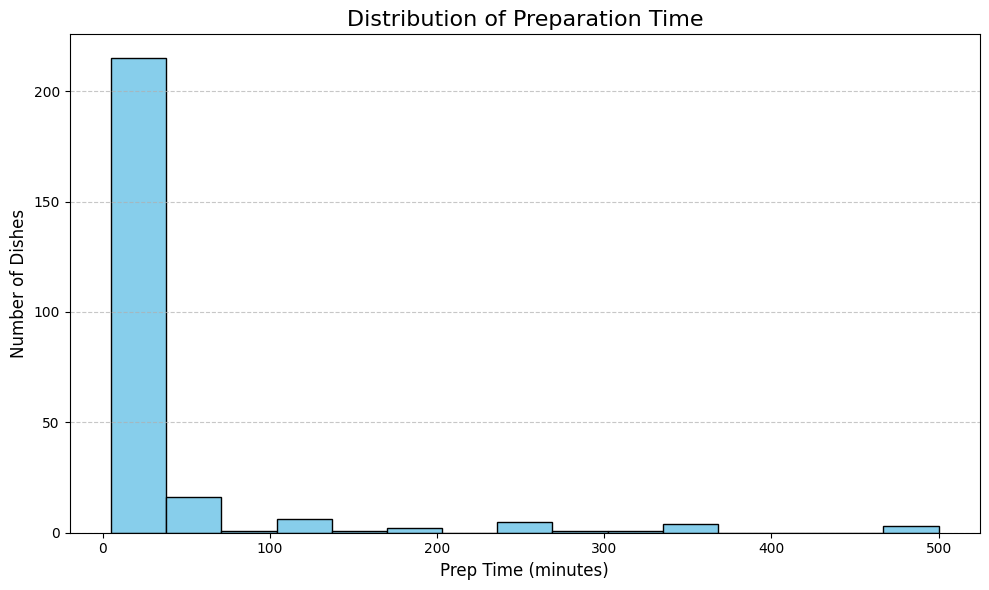

In [180]:


# Plot histogram for 'prep_time'
plt.figure(figsize=(10, 6))
plt.hist(df['prep_time'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Preparation Time', fontsize=16)
plt.xlabel('Prep Time (minutes)', fontsize=12)
plt.ylabel('Number of Dishes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


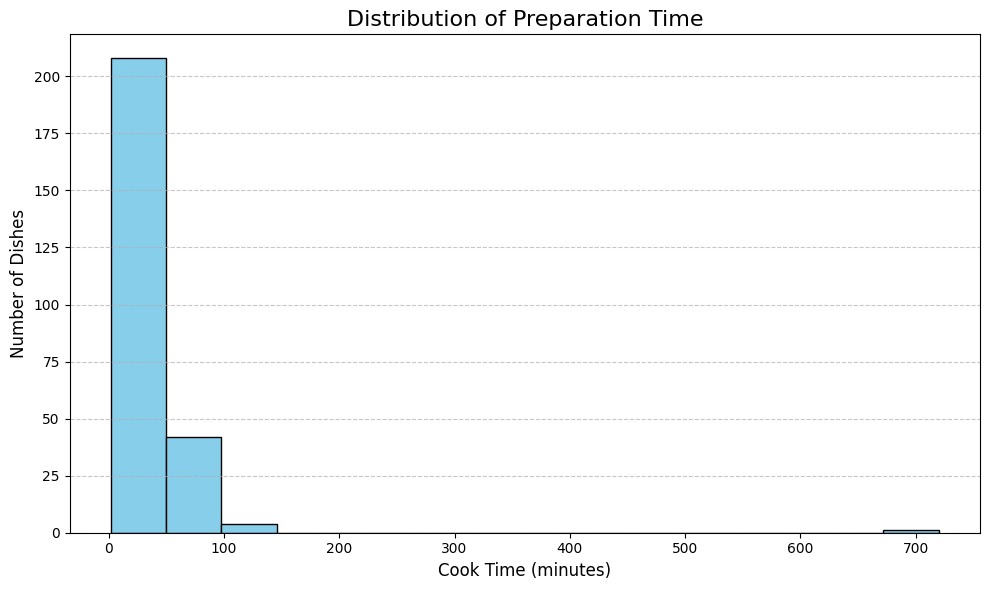

In [181]:


# Plot histogram for 'prep_time'
plt.figure(figsize=(10, 6))
plt.hist(df['cook_time'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Preparation Time', fontsize=16)
plt.xlabel('Cook Time (minutes)', fontsize=12)
plt.ylabel('Number of Dishes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


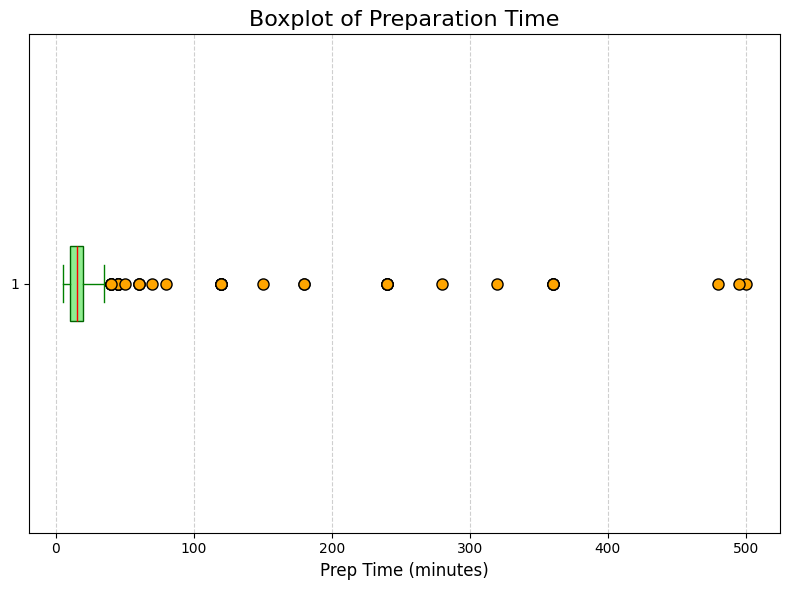

In [182]:
import matplotlib.pyplot as plt

# Boxplot for 'prep_time'
plt.figure(figsize=(8, 6))
plt.boxplot(df['prep_time'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='darkgreen'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='green'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=8))

plt.title('Boxplot of Preparation Time', fontsize=16)
plt.xlabel('Prep Time (minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


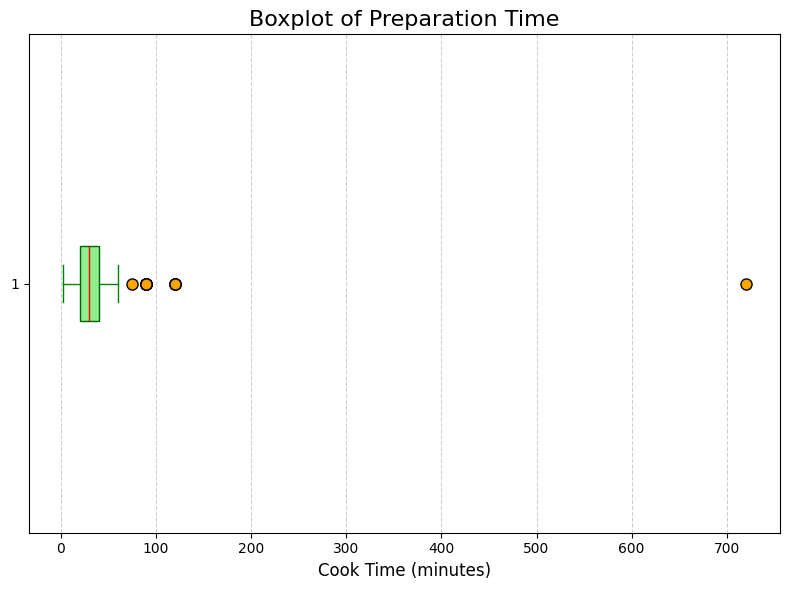

In [183]:
import matplotlib.pyplot as plt

# Boxplot for 'prep_time'
plt.figure(figsize=(8, 6))
plt.boxplot(df['cook_time'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='darkgreen'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='green'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=8))

plt.title('Boxplot of Preparation Time', fontsize=16)
plt.xlabel('Cook Time (minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-184-c94a4287766a>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['prep_time'], shade=True, color='purple')


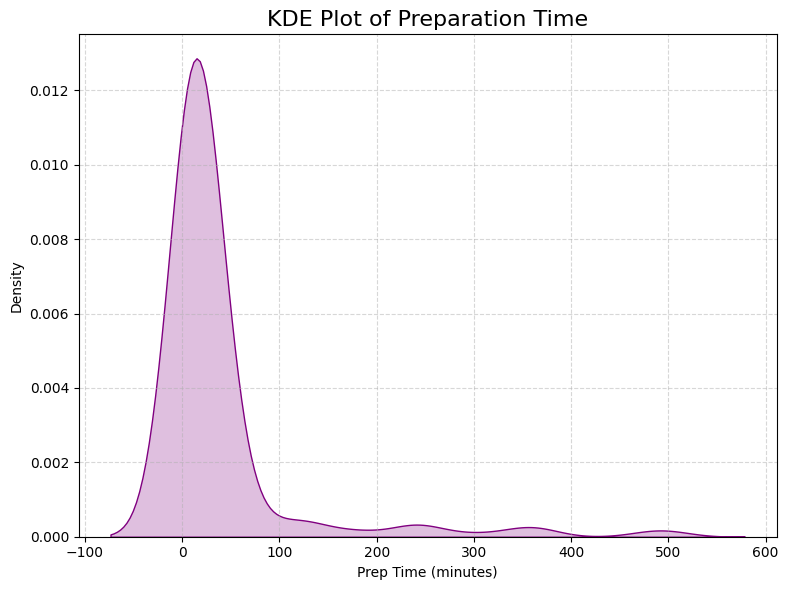

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE Plot for 'prep_time'
plt.figure(figsize=(8, 6))
sns.kdeplot(df['prep_time'], shade=True, color='purple')
plt.title('KDE Plot of Preparation Time', fontsize=16)
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-185-ee4f95e257db>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cook_time'], color = 'blue', shade = True)


Text(0, 0.5, 'Dish Count')

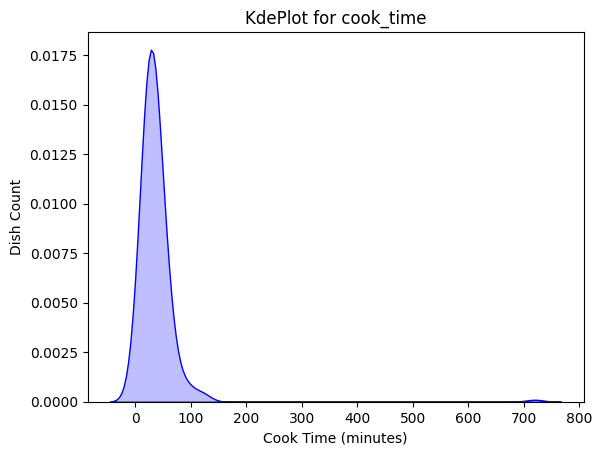

In [185]:
plt.figure(('16,9'))
sns.kdeplot(df['cook_time'], color = 'blue', shade = True)
plt.title('KdePlot for cook_time')
plt.xlabel('Cook Time (minutes)')
plt.ylabel('Dish Count')

In [186]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"['Maida flour', ' yogurt', ' oil', ' sugar']",vegetarian,45,25,sweet,dessert,west bengal,east
1,boondi,"['Gram flour', ' ghee', ' sugar']",vegetarian,80,30,sweet,dessert,rajasthan,west
2,gajar ka halwa,"['Carrots', ' milk', ' sugar', ' ghee', ' cash...",vegetarian,15,60,sweet,dessert,punjab,north
3,ghevar,"['Flour', ' ghee', ' kewra', ' milk', ' clarif...",vegetarian,15,30,sweet,dessert,rajasthan,west
4,gulab jamun,"['Milk powder', ' plain flour', ' baking powde...",vegetarian,15,40,sweet,dessert,west bengal,east


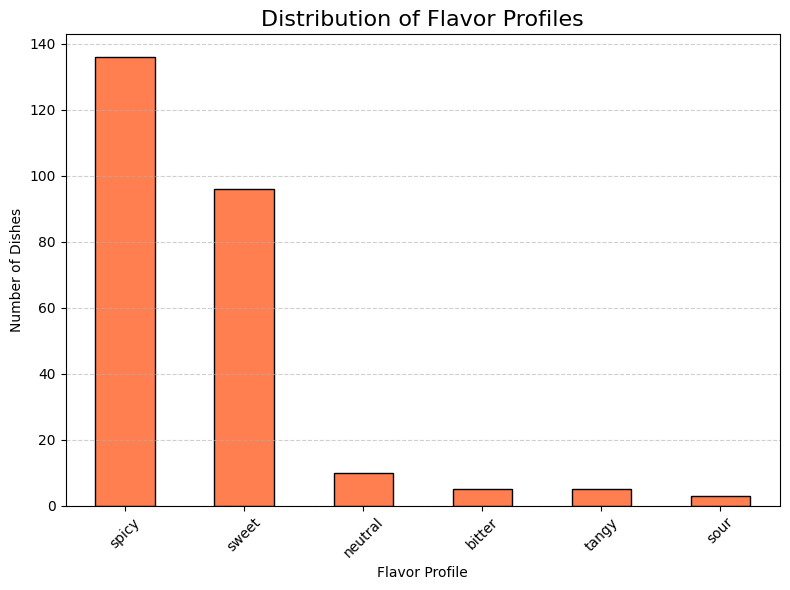

In [187]:
import matplotlib.pyplot as plt

# Count the occurrences of each flavor profile
flavor_counts = df['flavor_profile'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
flavor_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Flavor Profiles', fontsize=16)
plt.xlabel('Flavor Profile')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



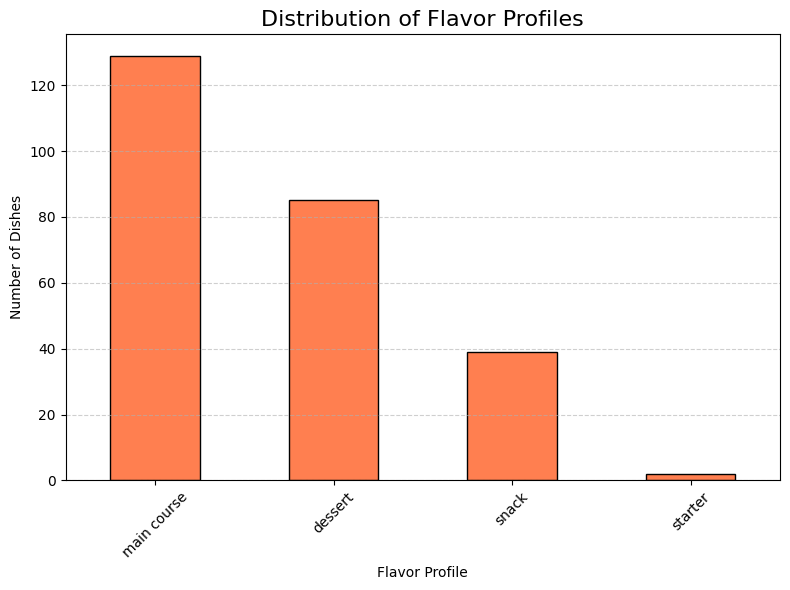

In [188]:
import matplotlib.pyplot as plt

# Count the occurrences of each flavor profile
flavor_counts = df['course'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
flavor_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Flavor Profiles', fontsize=16)
plt.xlabel('Flavor Profile')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



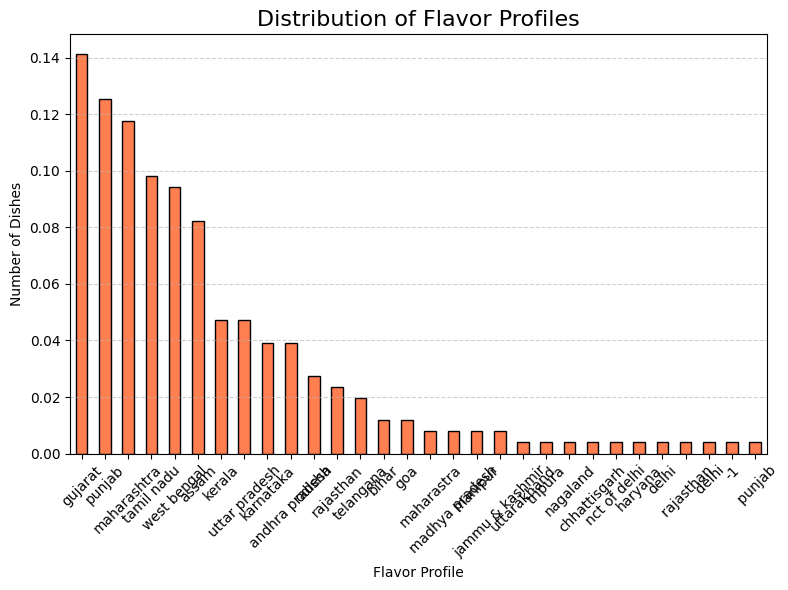

In [189]:
import matplotlib.pyplot as plt

# Count the occurrences of each flavor profile
flavor_counts = df['state'].value_counts(10)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
flavor_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Flavor Profiles', fontsize=16)
plt.xlabel('Flavor Profile')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [190]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,balu shahi,"['Maida flour', ' yogurt', ' oil', ' sugar']",vegetarian,45,25,sweet,dessert,west bengal,east
1,boondi,"['Gram flour', ' ghee', ' sugar']",vegetarian,80,30,sweet,dessert,rajasthan,west
2,gajar ka halwa,"['Carrots', ' milk', ' sugar', ' ghee', ' cash...",vegetarian,15,60,sweet,dessert,punjab,north
3,ghevar,"['Flour', ' ghee', ' kewra', ' milk', ' clarif...",vegetarian,15,30,sweet,dessert,rajasthan,west
4,gulab jamun,"['Milk powder', ' plain flour', ' baking powde...",vegetarian,15,40,sweet,dessert,west bengal,east


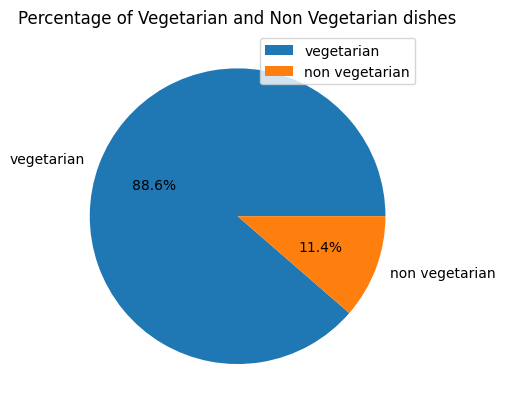

In [191]:
dishesDistrubution = df['diet'].value_counts()
plt.pie(dishesDistrubution, labels = dishesDistrubution.index, autopct = '%0.1f%%')
plt.title("Percentage of Vegetarian and Non Vegetarian dishes")
plt.legend()
plt.show()


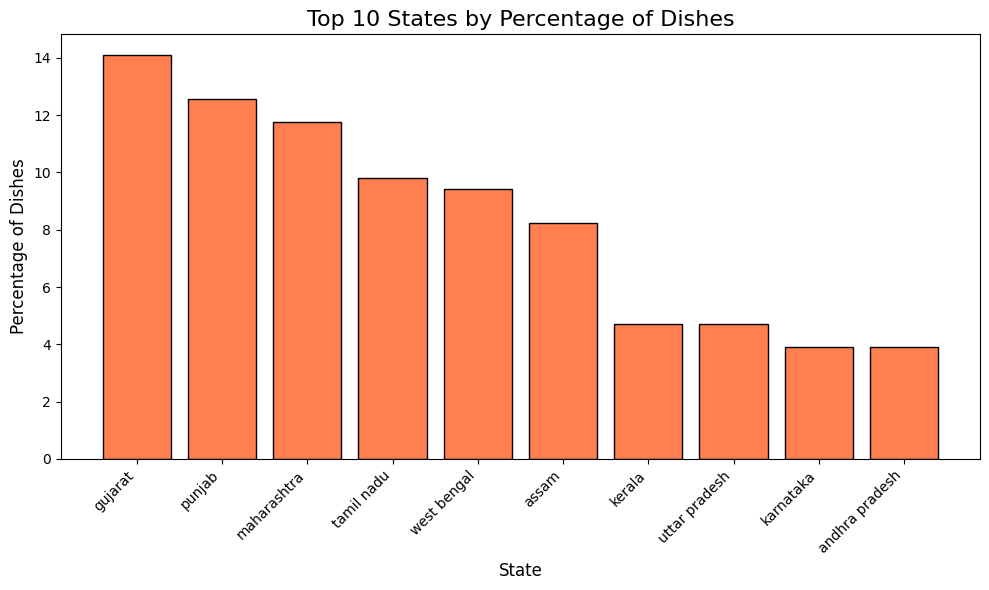

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of dishes for each state
state_percentages = df['state'].value_counts(normalize=True) * 100

# Get the top 10 states
top_10_states = state_percentages.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(top_10_states.index, top_10_states.values, color='coral', edgecolor = 'black')
plt.title('Top 10 States by Percentage of Dishes', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage of Dishes', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [193]:
df.corr(numeric_only= True)

,prep_time,cook_time
prep_time,1.000000,0.080296
cook_time,0.080296,1.000000


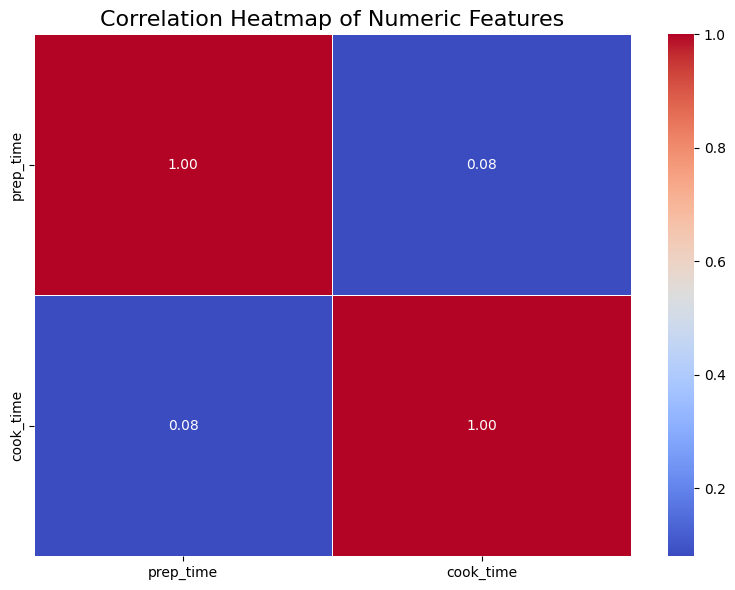

In [194]:


# Select only numerical columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


Bivariate Analysis

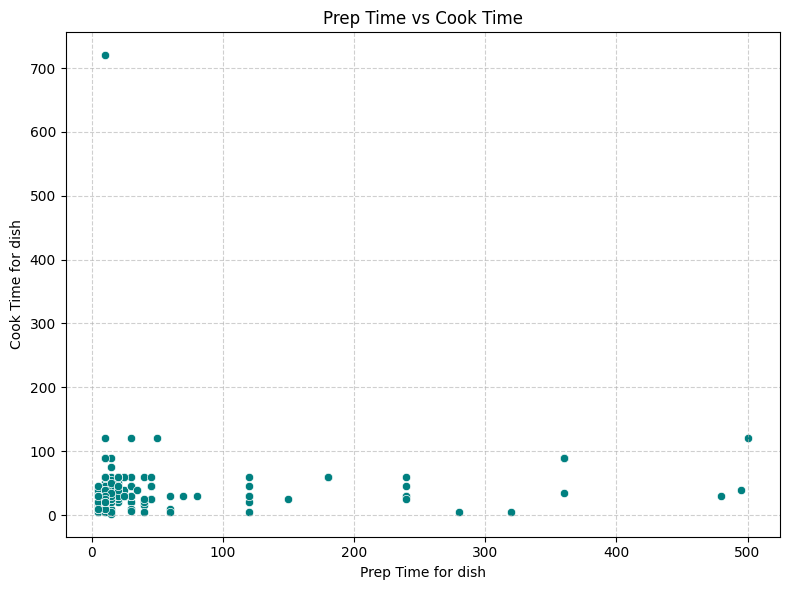

In [199]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'prep_time', y = 'cook_time', data = df, color = 'teal')
plt.title('Prep Time vs Cook Time')
plt.xlabel('Prep Time for dish')
plt.ylabel('Cook Time for dish')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [205]:
df['total_time'] =  df['prep_time'] + df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,balu shahi,"['Maida flour', ' yogurt', ' oil', ' sugar']",vegetarian,45,25,sweet,dessert,west bengal,east,70
1,boondi,"['Gram flour', ' ghee', ' sugar']",vegetarian,80,30,sweet,dessert,rajasthan,west,110
2,gajar ka halwa,"['Carrots', ' milk', ' sugar', ' ghee', ' cash...",vegetarian,15,60,sweet,dessert,punjab,north,75
3,ghevar,"['Flour', ' ghee', ' kewra', ' milk', ' clarif...",vegetarian,15,30,sweet,dessert,rajasthan,west,45
4,gulab jamun,"['Milk powder', ' plain flour', ' baking powde...",vegetarian,15,40,sweet,dessert,west bengal,east,55


<ipython-input-206-572611b053ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='course', y='total_time', data=df, palette='Set3')


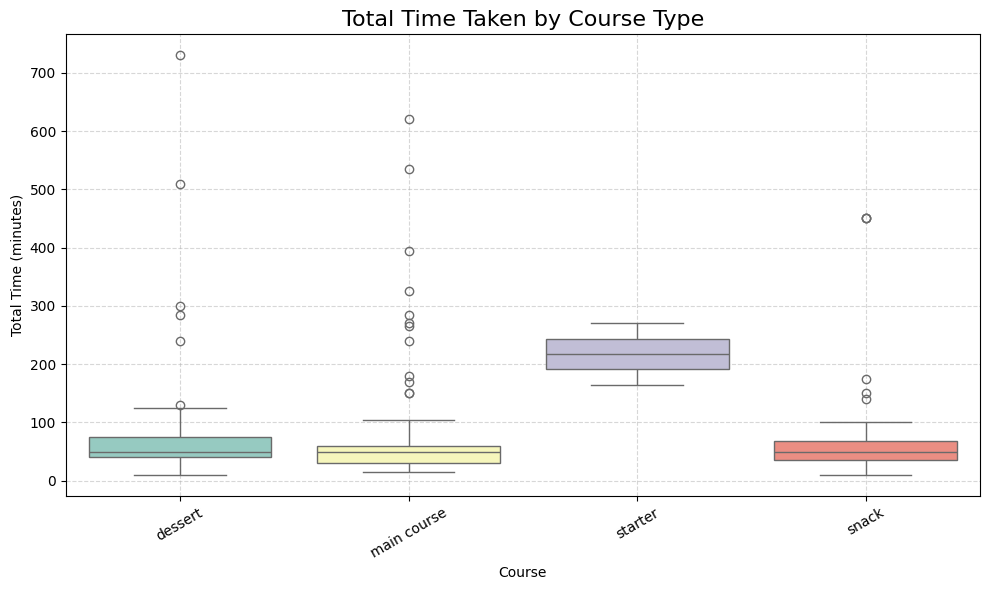

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='course', y='total_time', data=df, palette='Set3')
plt.title('Total Time Taken by Course Type', fontsize=16)
plt.xlabel('Course')
plt.ylabel('Total Time (minutes)')
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-211-bb395de2e382>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='flavor_profile', y='prep_time', data=df, palette='Pastel1')


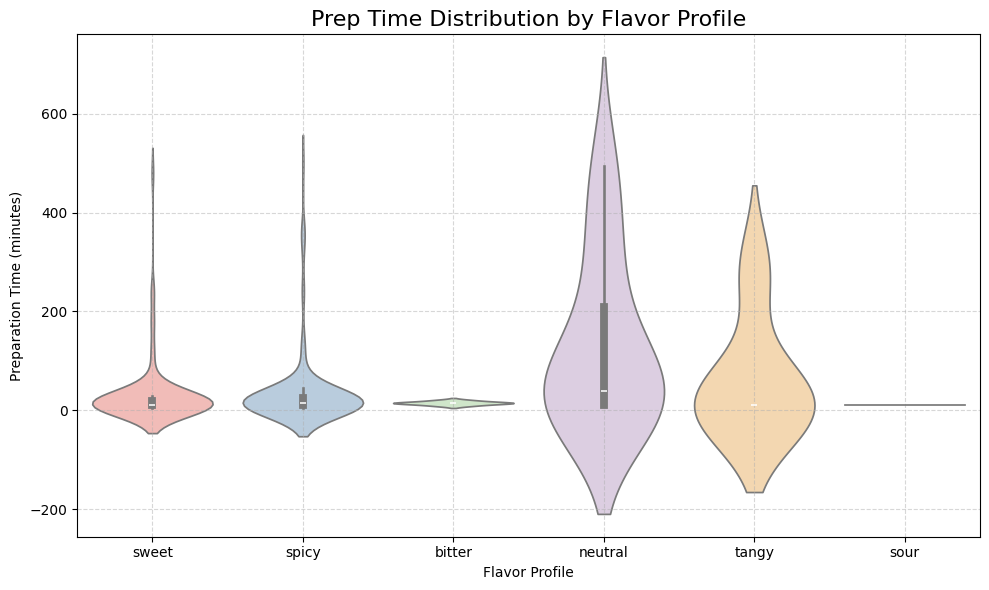

In [211]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='flavor_profile', y='prep_time', data=df, palette='Pastel1')
plt.title('Prep Time Distribution by Flavor Profile', fontsize=16)
plt.xlabel('Flavor Profile')
plt.ylabel('Preparation Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-212-fe586828273c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diet', y='cook_time', data=df, palette='coolwarm')


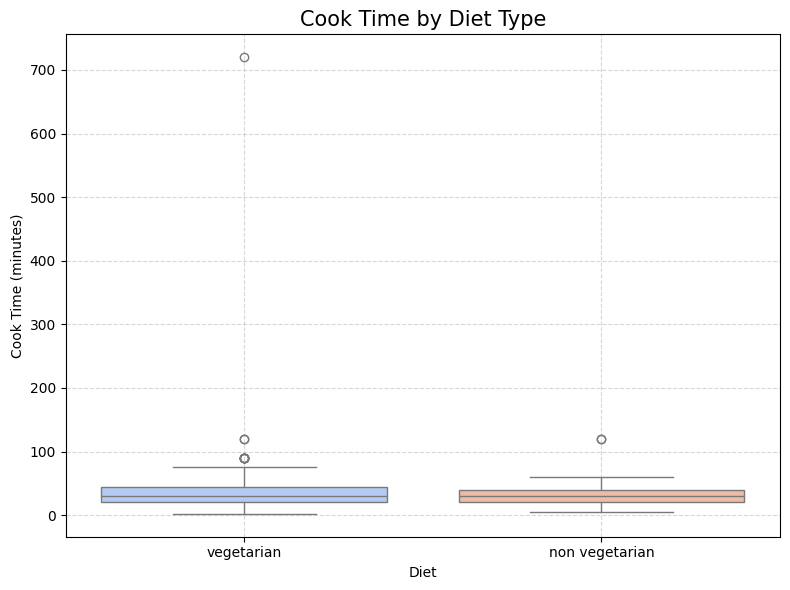

In [212]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diet', y='cook_time', data=df, palette='coolwarm')
plt.title('Cook Time by Diet Type', fontsize=15)
plt.xlabel('Diet')
plt.ylabel('Cook Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





<ipython-input-213-9fb3fcb88735>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


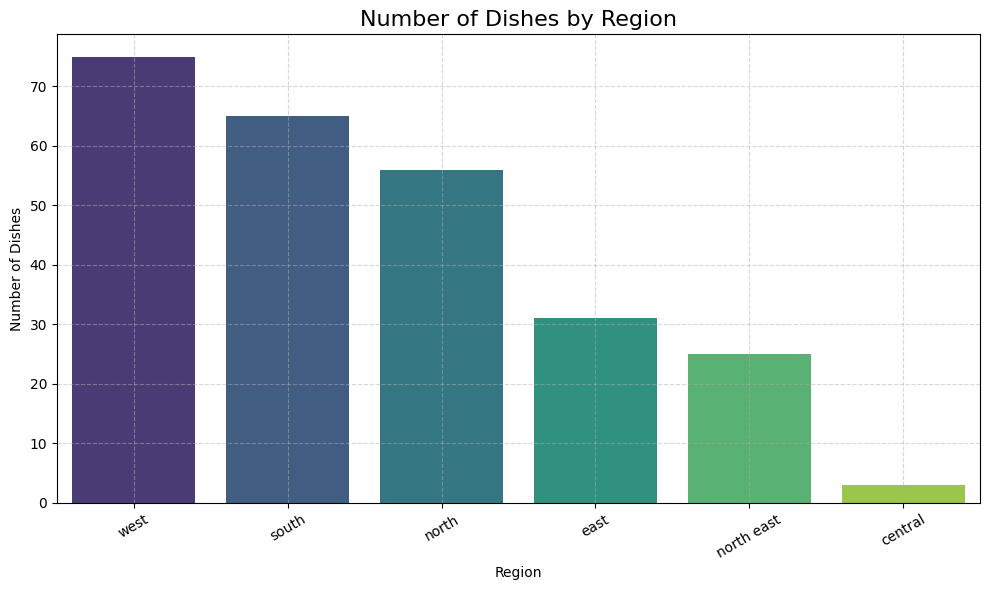

In [213]:
plt.figure(figsize=(10, 6))
region_counts = df['region'].value_counts()

sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Dishes by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


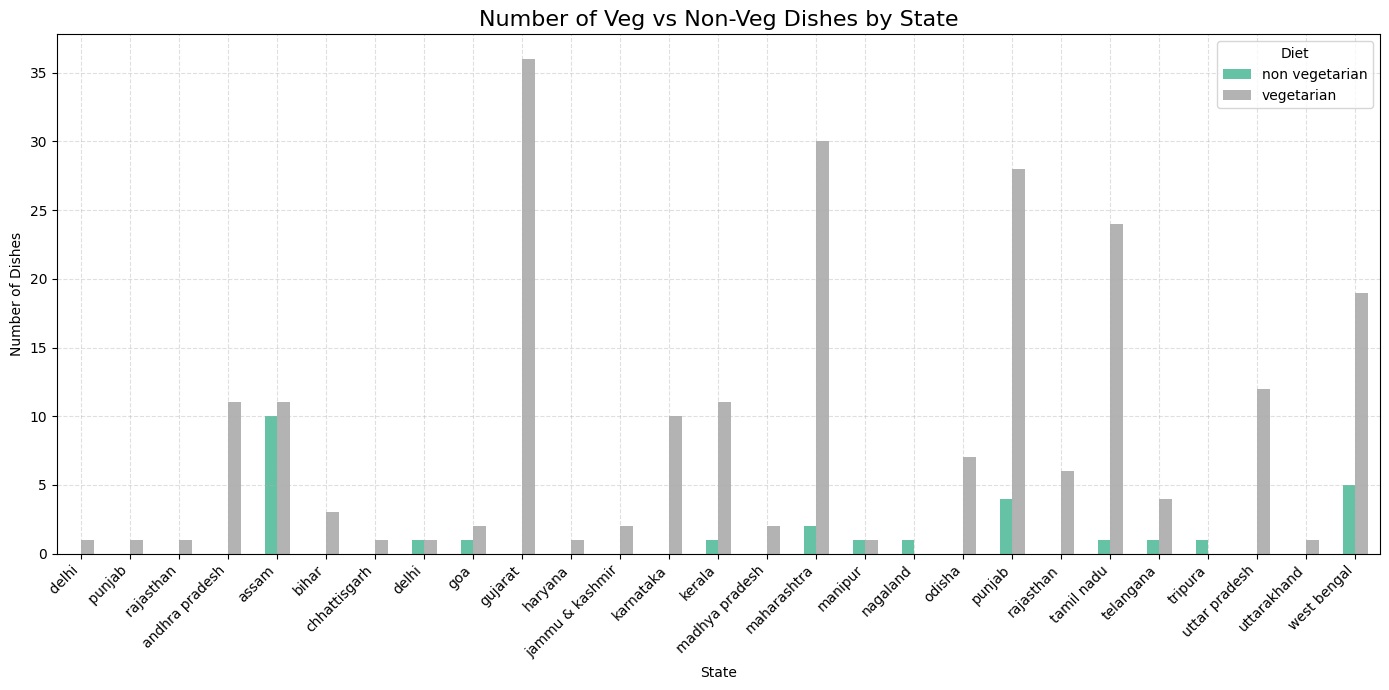

In [228]:
# Count of dishes per diet per state
diet_state_counts = df.groupby(['state', 'diet']).size().unstack(fill_value=0)
# Plot it!
diet_state_counts.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='Set2')
plt.title('Number of Veg vs Non-Veg Dishes by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diet')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()




In [222]:
df.loc[145, 'state'] = 'andhra pradesh'

In [226]:
df['state'] = df['state'].replace('nct of delhi', 'delhi')


In [227]:
df['state'] = df['state'].replace('maharastra', 'maharashtra')


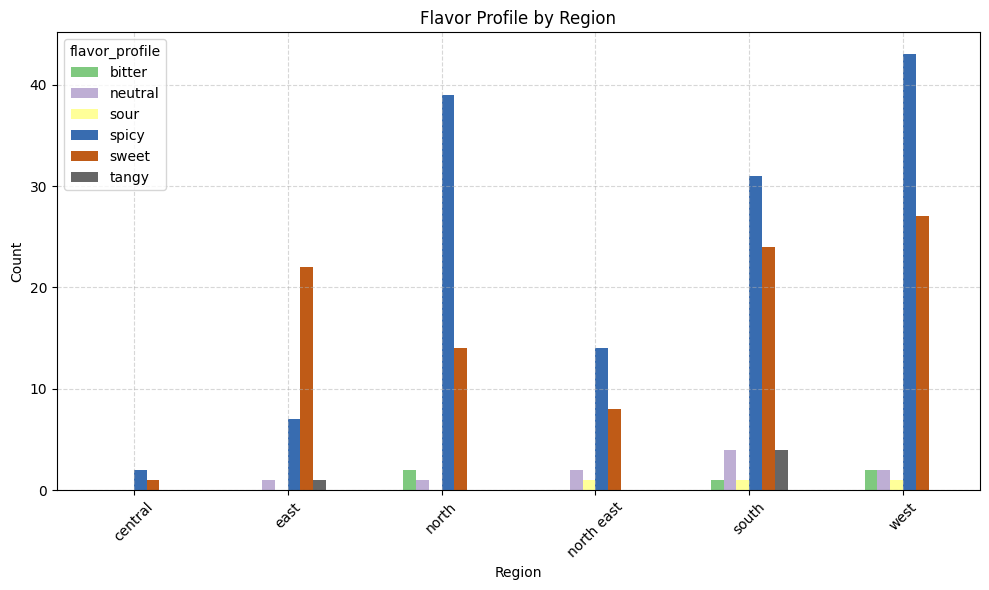

In [230]:
pd.crosstab(df['region'], df['flavor_profile']).plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Flavor Profile by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-231-c1e36ff37956>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='course', y='cook_time', data=df, palette='Pastel1')


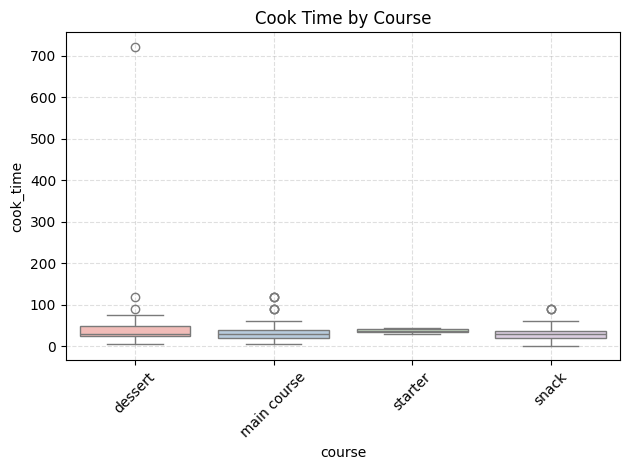

In [231]:
sns.boxplot(x='course', y='cook_time', data=df, palette='Pastel1')
plt.title('Cook Time by Course')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


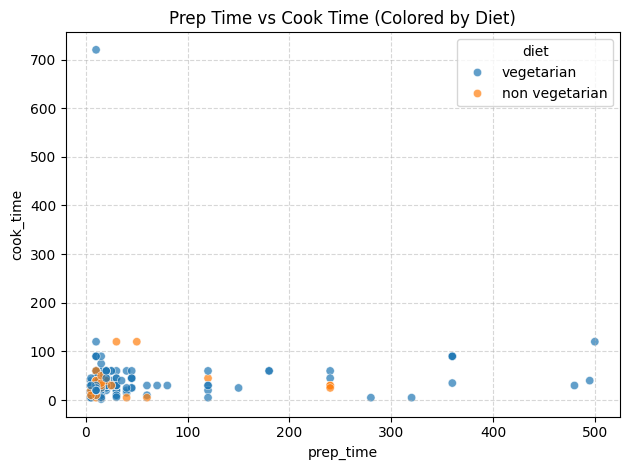

In [232]:
sns.scatterplot(x='prep_time', y='cook_time', data=df, hue='diet', alpha=0.7)
plt.title('Prep Time vs Cook Time (Colored by Diet)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


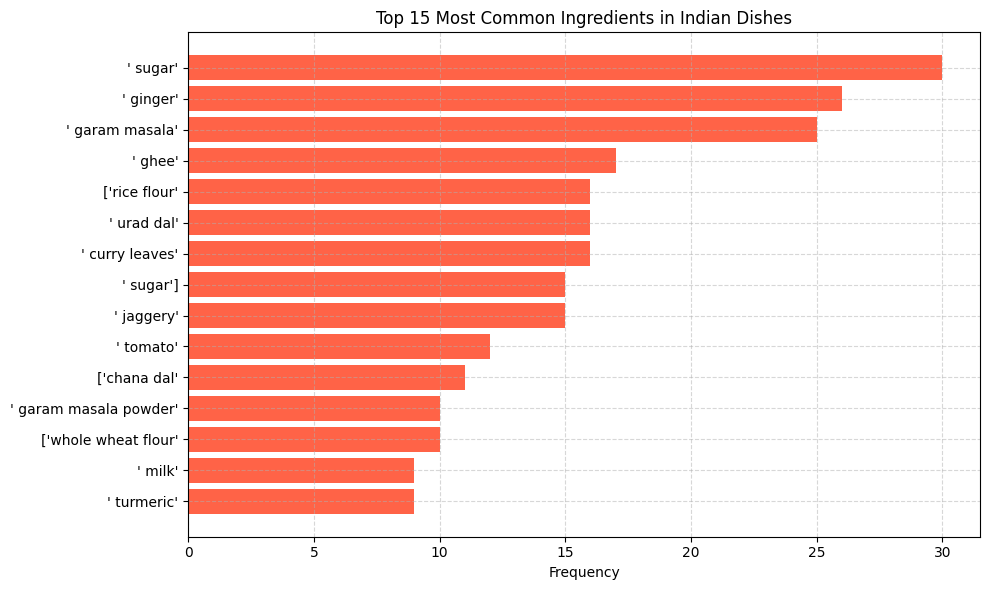

In [233]:
from collections import Counter

# Step 1: Convert all ingredients to lower-case and split into lists
ingredient_lists = df['ingredients'].dropna().apply(lambda x: [i.strip().lower() for i in x.split(',')])

# Step 2: Flatten the list
all_ingredients = [ingredient for sublist in ingredient_lists for ingredient in sublist]

# Step 3: Count frequencies
ingredient_counts = Counter(all_ingredients)

# Step 4: Get top 15 ingredients
top_ingredients = ingredient_counts.most_common(15)

# Step 5: Plot it
import matplotlib.pyplot as plt

ingredients, counts = zip(*top_ingredients)

plt.figure(figsize=(10,6))
plt.barh(ingredients[::-1], counts[::-1], color='tomato')
plt.xlabel('Frequency')
plt.title('Top 15 Most Common Ingredients in Indian Dishes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🧠 Top Insights from the Analysis
1. 🌶️ Spicy Business: South India rules the spice game
South region had the most “spicy” flavor_profile dishes.
North India also showed strong spicy representation, but South took the crown.
“South Indian kitchens: Not just hot, but volcanically flavorful.”

2. 🥗 Veg vs Non-Veg: A Green Majority
Veg dishes dominate the dataset.
Most states lean veg — with a few non-veg loyalists showing up like Kerala and West Bengal.
“India is green not just in geography, but in diet too.”

3. ⏳ Desserts = Fast & Sweet
Boxplot showed that desserts have the shortest cook times.
Main course dishes (especially non-veg) tend to take longer.
“Desserts are like good friends—sweet and don’t waste your time.”

4. 🧑‍🍳 Prep Time ≠ Cook Time
Scatter plot showed no strong correlation between prep time and cook time.
Some dishes are high effort to prep but cook fast (like samosas). Others are low prep but slow cook (like dals). “Don’t judge a dish by its chopping time.”

5. 🧂 Some Dishes are Flavor Orphans
A few entries had NaN in flavor_profile, which may suggest missing categorization.
Room for expanding or reclassifying flavor categories. Maybe savory-sweet?

6. 📍 Maharashtra & Delhi have duplicate identities
“Maharastra” typo and “NCT of Delhi” were merged.
Standardizing categories is key before analysis.

7. 🕐 Total Time Distribution is Wide
Some dishes were total time monsters (over 200 minutes!), while many stayed under 60.
There’s a good variety of dishes for all types of cooks — from lazy to legend. 😅